In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load the Dataset

In [113]:
import pandas as pd

In [114]:
df = pd.read_csv('/content/drive/MyDrive/projects/Cognify Internship task/restaurant.csv')

In [115]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# **Level 1 : Task 1**
**Task: Data Exploration and Preprocessing**

# Explore the dataset and identify the number of rows and columns.

In [116]:
# There are total 9551 rows and 21 columns in our data
df.shape

(9551, 21)

# Check for missing values in each column and handle them accordingly.

In [117]:
# There is 9 missing values in Cuisines column
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [118]:
# Most occuring value in Cuisines column
df['Cuisines'].mode()[0]

'North Indian'

In [119]:
# Filling missing value with mode because Cuisine column is categorical
df['Cuisines'].fillna(df['Cuisines'].mode()[0],inplace=True)

In [120]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Perform data type conversion if necessary.

In [121]:
# No need of data type conversion
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9551 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

# Analyze the distribution of the target variable ("Aggregate rating") an identify any class imbalances.

<Axes: xlabel='Aggregate rating', ylabel='Density'>

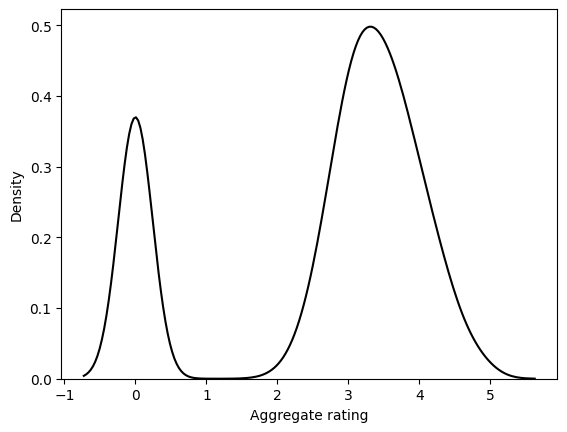

In [122]:
# Aggregate rating between -1 to 1 having less density than Aggregate rating between 2 to 5.
import seaborn as sns
sns.kdeplot(df['Aggregate rating'],c='black')

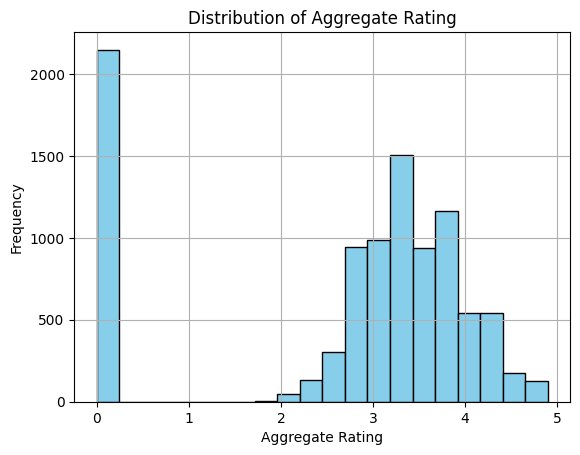

In [123]:
# it is important to consider that the x-axis does not show the exact numerical values for each class.
# hence, it is difficult to say definitively whether there is a statistically significant imbalance.
import matplotlib.pyplot as plt
df['Aggregate rating'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# **Level 1 : Task 2**
**Task: Descriptive Analysis**

# Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [124]:
# Extracting numerical columns from the dataset
numerical_columns = []
for column in df.columns:
  if df[column].dtype in ['int64','float64']:
    numerical_columns.append(column)

In [125]:
# mean,median and standard deviation of each numerical columns
for column in numerical_columns:
  print(f'The mean of {column} is {df[column].mean()}')
  print(f'The median of {column} is {df[column].median()}')
  print(f'The standard deviation of {column} is {df[column].std()}')

The mean of Restaurant ID is 9051128.349178096
The median of Restaurant ID is 6004089.0
The standard deviation of Restaurant ID is 8791521.282104284
The mean of Country Code is 18.365616165846507
The median of Country Code is 1.0
The standard deviation of Country Code is 56.75054560094657
The mean of Longitude is 64.12657446168706
The median of Longitude is 77.1919642
The standard deviation of Longitude is 41.46705784761728
The mean of Latitude is 25.854380700074756
The median of Latitude is 28.57046888
The standard deviation of Latitude is 11.007935124784668
The mean of Average Cost for two is 1199.2107632708617
The median of Average Cost for two is 400.0
The standard deviation of Average Cost for two is 16121.183073499644
The mean of Price range is 1.804837189823055
The median of Price range is 2.0
The standard deviation of Price range is 0.905608847397614
The mean of Aggregate rating is 2.66637001361114
The median of Aggregate rating is 3.2
The standard deviation of Aggregate rating

# Explore the distribution of categorical variables like "Country Code", "City", and "Cuisines".

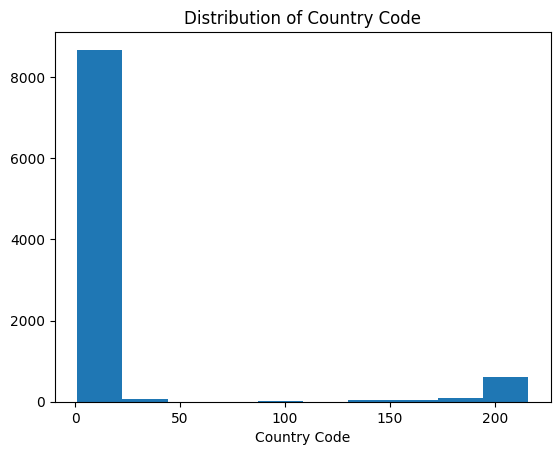

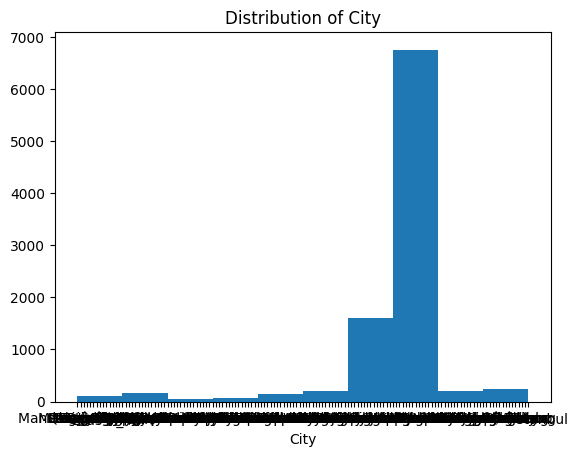

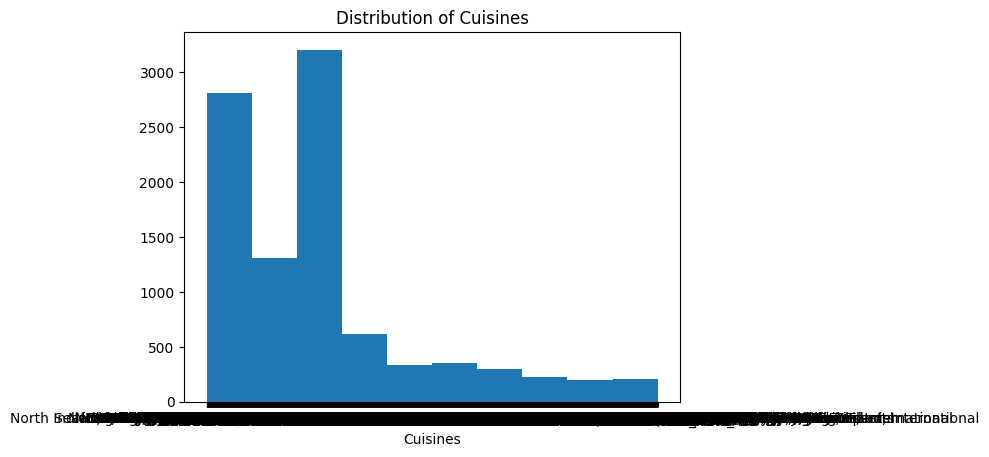

In [126]:
categorical_columns =['Country Code','City','Cuisines']
for column in categorical_columns:
  plt.hist(df[column])
  plt.title(f'Distribution of {column}')
  plt.xlabel(column)
  plt.show()

# Identify the top cuisines and cities with the highest number of restaurants.

In [127]:
# Top 10 Cuisines
df['Cuisines'].value_counts().head(10)

North Indian                      945
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

In [128]:
# Top 5 Cities
df['City'].value_counts().head(5)

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

# **Level 1 : Task 3**
**Task: Geospatial Analysis**

# Visualize the locations of restaurants on a map using latitude and longitude information.

In [129]:
import folium
map_center = [df['Latitude'].mean(), df['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

for index, row in df.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']], popup=row['Restaurant Name']).add_to(restaurant_map)

restaurant_map

Output hidden; open in https://colab.research.google.com to view.

# Analyze the distribution of restaurants across different cities or countries.

In [130]:
# count of restaurants across different cities
restaurant_counts = df['City'].value_counts()
restaurant_counts

New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64

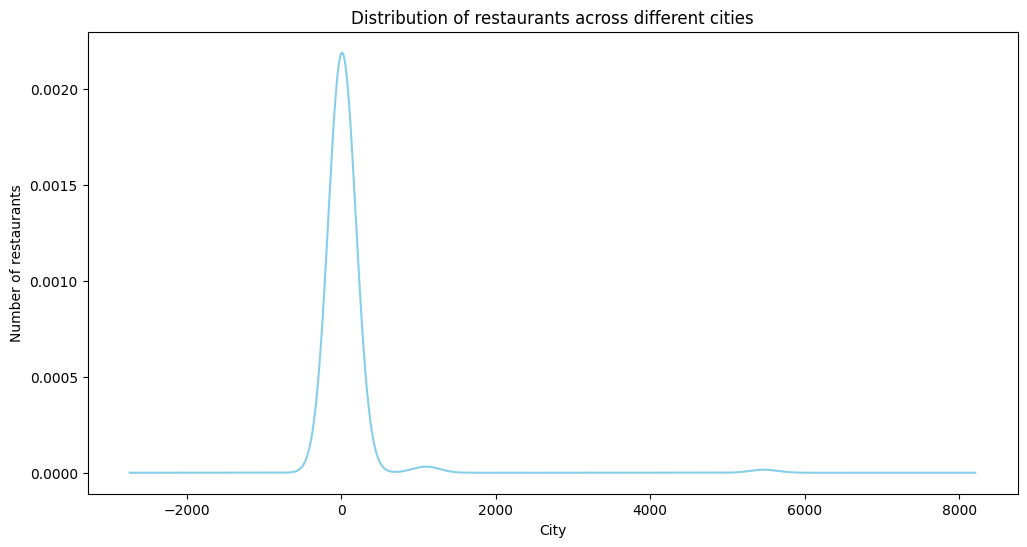

In [131]:
# Distribution of restaurants across different cities is leptokurtic and positively skewed
plt.figure(figsize=(12,6))
restaurant_counts.plot(kind='kde',color='skyblue')
plt.title('Distribution of restaurants across different cities')
plt.xlabel('City')
plt.ylabel('Number of restaurants')
plt.show()

# Determine if there is any correlation between the restaurant's location and its rating.

In [132]:
correlation_matrix = df[['Latitude','Longitude','Aggregate rating']].corr()

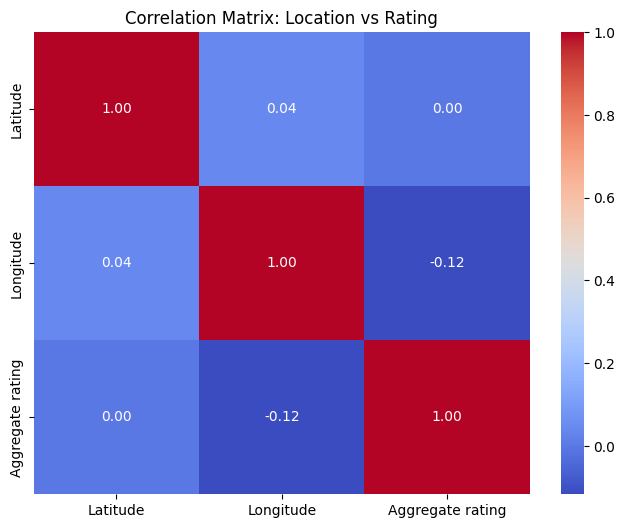

In [133]:
# correlation matrix between restaurant's location and its rating
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Matrix: Location vs Rating')
plt.show()
# There is slightly negative correlation between Longitude and Aggregate rating

# **Level 2 : Task 1**
**Task: Table Booking and Online Delivery**

# Determine the percentage of restaurants that offer table booking and online delivery.

In [134]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [135]:
total_restaurants = len(df)
table_booking_count = df['Has Table booking'].value_counts()['Yes']
online_delivery_count = df['Has Online delivery'].value_counts()['Yes']

In [136]:
# percentage of restaurants that offer table booking and online delivery
percentage_table_booking = (table_booking_count/total_restaurants)*100
percentage_online_delivery = (online_delivery_count/total_restaurants)*100

In [137]:
print(f"Percentage of restaurant offering table booking : {percentage_table_booking:.2f}%")
print(f"Percentage of restaurant offering online delivery : {percentage_online_delivery:.2f}%")

Percentage of restaurant offering table booking : 12.12%
Percentage of restaurant offering online delivery : 25.66%


# Compare the average ratings of restaurants with table booking and those without.

In [138]:
# average ratings of restaurants with table booking and those without table booking
avg_rating_with_table_booking = df[df['Has Table booking']=='Yes']['Aggregate rating'].mean()
avg_rating_without_table_booking = df[df['Has Table booking']=='No']['Aggregate rating'].mean()

In [139]:
print(f'Average rating of restaurants with table booking is {avg_rating_with_table_booking:.2f}')
print(f'Average rating of restaurants without table booking is {avg_rating_without_table_booking:.2f}')

Average rating of restaurants with table booking is 3.44
Average rating of restaurants without table booking is 2.56


# Analyze the availability of online delivery among restaurants with different price ranges.

In [140]:
df['Price range'].value_counts()

1    4444
2    3113
3    1408
4     586
Name: Price range, dtype: int64

In [141]:
price_ranges = [1, 2, 3, 4]
online_delivery_counts = {price_range: 0 for price_range in price_ranges}

for price_range in price_ranges:
    price_range_restaurants = df[df['Price range'] == price_range]
    online_delivery_counts[price_range] = len(price_range_restaurants[df['Has Online delivery'] == 'Yes'])

online_delivery_counts

<ipython-input-141-cb1a95e83f6b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  online_delivery_counts[price_range] = len(price_range_restaurants[df['Has Online delivery'] == 'Yes'])


{1: 701, 2: 1286, 3: 411, 4: 53}

In [142]:
# availability of online delivery among restaurants with different price ranges
for price_range, count in online_delivery_counts.items():
    print(f"Price Range {price_range}: {count} restaurants offer online delivery.")

Price Range 1: 701 restaurants offer online delivery.
Price Range 2: 1286 restaurants offer online delivery.
Price Range 3: 411 restaurants offer online delivery.
Price Range 4: 53 restaurants offer online delivery.


In [143]:
# availability of online delivery among restaurants with different price ranges in percentage
total_restaurants = len(df)
for price_range, count in online_delivery_counts.items():
    percentage = (count / total_restaurants) * 100
    print(f"Percentage of restaurants with Price Range {price_range} offering online delivery: {percentage:.2f}%")

Percentage of restaurants with Price Range 1 offering online delivery: 7.34%
Percentage of restaurants with Price Range 2 offering online delivery: 13.46%
Percentage of restaurants with Price Range 3 offering online delivery: 4.30%
Percentage of restaurants with Price Range 4 offering online delivery: 0.55%


# **Level 2 : Task 2**
**Task: Price Range Analysis**

# Determine the most common price range among all the restaurants.

In [144]:
# most common price range among all the restaurants is 1
most_common_price_range = df['Price range'].value_counts().idxmax()
print(f"The most common price range among all the restaurants is {most_common_price_range}")

The most common price range among all the restaurants is 1


# Calculate the average rating for each price range.

In [145]:
# average rating for each price range
price_ranges = [1,2,3,4]
for price_range in price_ranges:
  average_rating = df[df['Price range']==price_range]['Aggregate rating'].mean()
  print(f"The average rating of price range {price_range} is {average_rating}")

The average rating of price range 1 is 1.999887488748875
The average rating of price range 2 is 2.9410536460006425
The average rating of price range 3 is 3.6833806818181816
The average rating of price range 4 is 3.8179180887372017


# Identify the color that represents the highest average rating among different price ranges.

In [146]:
# the color that represents the highest average rating among different price ranges is Green
price_groups = df.groupby('Price range')
avg_ratings = price_groups['Aggregate rating'].mean()
highest_rated_price_range = avg_ratings.idxmax()
highest_rating_color = df[df['Price range'] == highest_rated_price_range]['Rating color'].iloc[0]
print(f"The color that represents the highest average rating is: {highest_rating_color}")

The color that represents the highest average rating is: Green


# **Level 2 : Task 3**
**Task: Feature Engineering**

# Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [147]:
df['Address'].unique()

array(['Third Floor, Century City Mall, Kalayaan Avenue, Poblacion, Makati City',
       'Little Tokyo, 2277 Chino Roces Avenue, Legaspi Village, Makati City',
       'Edsa Shangri-La, 1 Garden Way, Ortigas, Mandaluyong City', ...,
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 56, Be��ikta��, ��stanbul',
       'Kuru�_e��me Mahallesi, Muallim Naci Caddesi, No 64/B, Be��ikta��, ��stanbul',
       'Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, Kad۱k�_y, ��stanbul'],
      dtype=object)

In [148]:
df['Address'].dtype

dtype('O')

In [149]:
df[~df['Address'].str.contains('^[a-zA-Z0-9, ]+$')]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
13,6310470,Guevarra's,162,San Juan City,"387 P. Guevarra Corner Argonne Street, Additio...",Addition Hills,"Addition Hills, San Juan City",121.033592,14.593450,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.2,Green,Very Good,458
14,6314605,Sodam Korean Restaurant,162,San Juan City,"17 J. Abad Santos Drive, Little Baguio, San Ju...",Little Baguio,"Little Baguio, San Juan City",121.038110,14.598890,Korean,...,Botswana Pula(P),No,No,No,No,3,4.3,Green,Very Good,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [150]:
df['Address'] = df['Address'].replace({r'[^\x00-\x7F]+': ''}, regex=True)

In [151]:
df.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafeaa Mahallesi, Bademalt Sokak, No 21/B, Kad...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [152]:
df_expanded = df['Address'].str.split(',', expand=True)

In [153]:
df = pd.concat([df, df_expanded], axis=1)

In [154]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,0,1,2,3,4,5,6,7,8,9
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Third Floor,Century City Mall,Kalayaan Avenue,Poblacion,Makati City,None,None,None,None,None
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Little Tokyo,2277 Chino Roces Avenue,Legaspi Village,Makati City,None,None,None,None,None,None
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Edsa Shangri-La,1 Garden Way,Ortigas,Mandaluyong City,None,None,None,None,None,None
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Third Floor,Mega Fashion Hall,SM Megamall,Ortigas,Mandaluyong City,None,None,None,None,None
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Third Floor,Mega Atrium,SM Megamall,Ortigas,Mandaluyong City,None,None,None,None,None


In [155]:
df.shape

(9551, 31)

# Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [156]:
print(df['Has Online delivery'].value_counts())
print(df['Has Table booking'].value_counts())

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64
No     8393
Yes    1158
Name: Has Table booking, dtype: int64


In [157]:
# encoding categorical variable using pandas
encoded_columns = pd.get_dummies(df[['Has Table booking','Has Online delivery']])

In [158]:
df = pd.concat([df,encoded_columns],axis=1)

In [159]:
df.columns

Index([          'Restaurant ID',         'Restaurant Name',
                  'Country Code',                    'City',
                       'Address',                'Locality',
              'Locality Verbose',               'Longitude',
                      'Latitude',                'Cuisines',
          'Average Cost for two',                'Currency',
             'Has Table booking',     'Has Online delivery',
             'Is delivering now',    'Switch to order menu',
                   'Price range',        'Aggregate rating',
                  'Rating color',             'Rating text',
                         'Votes',                         0,
                               1,                         2,
                               3,                         4,
                               5,                         6,
                               7,                         8,
                               9,    'Has Table booking_No',
         'Has Table book

# **Level 3 : Task 1**
**Task: Predictive Modeling**

# Split the dataset into training and testing sets

In [160]:
# dropped unnecessary columns
df = df.drop(columns=['Restaurant ID',0,1,2,3,4,5,6,7,8,9,'Has Table booking_No','Has Table booking_Yes','Has Online delivery_No','Has Online delivery_Yes'])

In [161]:
df.columns

Index(['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [162]:
df.dtypes

Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [163]:
# handling ? symbol in the all columns
for column in df.columns:
  df[column] = df[column].replace({r'[^\x00-\x7F]+': ''}, regex=True)

In [164]:
df.tail()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9546,Naml Gurme,208,stanbul,"Kemanke Karamustafa Paa Mahallesi, Rhtm Caddes...",Karak_y,"Karak_y, stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,Ceviz Aac,208,stanbul,"Kouyolu Mahallesi, Muhittin st_nda Caddesi, No...",Kouyolu,"Kouyolu, stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,Huqqa,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 5...",Kuru_eme,"Kuru_eme, stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,Ak Kahve,208,stanbul,"Kuru_eme Mahallesi, Muallim Naci Caddesi, No 6...",Kuru_eme,"Kuru_eme, stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901
9550,Walter's Coffee Roastery,208,stanbul,"Cafeaa Mahallesi, Bademalt Sokak, No 21/B, Kad...",Moda,"Moda, stanbul",29.026016,40.984776,Cafe,55,Turkish Lira(TL),No,No,No,No,2,4.0,Green,Very Good,591


In [165]:
# extracting categorical columns from the dataframe
categorical_column = []
for column in df.columns:
  if df[column].dtype == 'object':
    categorical_column.append(column)
print(categorical_column)

['Restaurant Name', 'City', 'Address', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Rating color', 'Rating text']


In [166]:
# converting categorical columns into numeric columns using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in categorical_column:
  df[column] = le.fit_transform(df[column])

In [167]:
df.head()

,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,3748,162,73,8686,171,172,121.027535,14.565443,920,1100,0,1,0,0,0,3,4.8,0,1,314
1,3172,162,73,6055,593,601,121.014101,14.553708,1111,1200,0,1,0,0,0,3,4.5,0,1,591
2,2897,162,75,4684,308,314,121.056831,14.581404,1671,4000,0,1,0,0,0,4,4.4,1,5,270
3,4707,162,75,8691,862,875,121.056475,14.585318,1126,1500,0,0,0,0,0,4,4.9,0,1,365
4,5523,162,75,8690,862,875,121.057508,14.584450,1122,1500,0,1,0,0,0,4,4.8,0,1,229


In [168]:
# extracting input features and output feature
X = df.drop(columns='Aggregate rating')
y = df['Aggregate rating']

In [169]:
# splitting the data into training and testing set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7640, 19)
(1911, 19)
(7640,)
(1911,)


# **LINEAR REGRESSION**

# Build a regression model to predict the aggregate rating of a restaurant based on available features.

In [170]:
# applying linear regression on the data
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [171]:
y_pred

array([3.94713181, 5.72707251, 5.20242436, ..., 3.9041207 , 1.3387782 ,
       1.01335068])

# evaluate the model's performance using appropriate metrics.

In [172]:
# checking performnace of linear regression model
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
MSE_lr = mean_squared_error(y_test,y_pred)
RMSE_lr = np.sqrt(MSE_lr)
MAE_lr = mean_absolute_error(y_test,y_pred)
r2_lr = r2_score(y_test,y_pred)
adj_r2_lr = 1-(((1-r2_lr)*(len(y_test)-1))/((len(y_test)-len(df.columns)-1)))

In [173]:
print(MSE_lr)
print(RMSE_lr)
print(MAE_lr)
print(r2_lr)
print(adj_r2_lr)

1.2104917348316981
1.100223493128418
0.9154109973010176
0.4668741568165574
0.46123261350244693


# Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

# **DECISION TREE**

In [174]:
# applying decision tree on the data
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(criterion='squared_error',splitter='best')
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [175]:
y_pred

array([3.1, 4.7, 3. , ..., 2.7, 0. , 0. ])

In [176]:
# checking performance of decision tree model
MSE_dt = mean_squared_error(y_test,y_pred)
RMSE_dt = np.sqrt(MSE_dt)
MAE_dt = mean_absolute_error(y_test,y_pred)
r2_dt = r2_score(y_test,y_pred)
adj_r2_dt = 1-(((1-r2_dt)*(len(y_test)-1))/((len(y_test)-len(df.columns)-1)))

In [177]:
print(MSE_dt)
print(RMSE_dt)
print(MAE_dt)
print(r2_dt)
print(adj_r2_dt)

0.05642595499738356
0.23754148058262067
0.14992150706436422
0.9751488308678179
0.9748858555330858


# **RANDOM FOREST**

In [178]:
# applying random forest on the data
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [179]:
y_pred

array([2.965, 4.727, 3.029, ..., 3.055, 0.   , 0.   ])

In [180]:
# checking performance of random forest model
MSE_rf = mean_squared_error(y_test,y_pred)
RMSE_rf = np.sqrt(MSE_rf)
MAE_rf = mean_absolute_error(y_test,y_pred)
r2_rf = r2_score(y_test,y_pred)
adj_r2_rf = 1-(((1-r2_rf)*(len(y_test)-1))/((len(y_test)-len(df.columns)-1)))

In [181]:
print(MSE_rf)
print(RMSE_rf)
print(MAE_rf)
print(r2_rf)
print(adj_r2_rf)

0.02896933124018836
0.17020379326028065
0.11533961276818419
0.987241301448429
0.9871062887653437


In [182]:
# Interpretation : Among Linear Regression, Decision Tree and Random Forest algorithms Random Forest Algorithm performs well.

# **Level 3 : Task 2**
**Task: Customer Preference Analysis**

# Analyze the relationship between the type of cuisine and the restaurant's rating.

In [183]:
df['Cuisines'].unique()

array([ 920, 1111, 1671, ...,  319, 1824, 1110])

In [184]:
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
avg_rating_by_cuisine

Cuisines
1062    4.9
949     4.9
93      4.9
683     4.9
796     4.9
       ... 
850     0.0
844     0.0
415     0.0
1687    0.0
864     0.0
Name: Aggregate rating, Length: 1825, dtype: float64

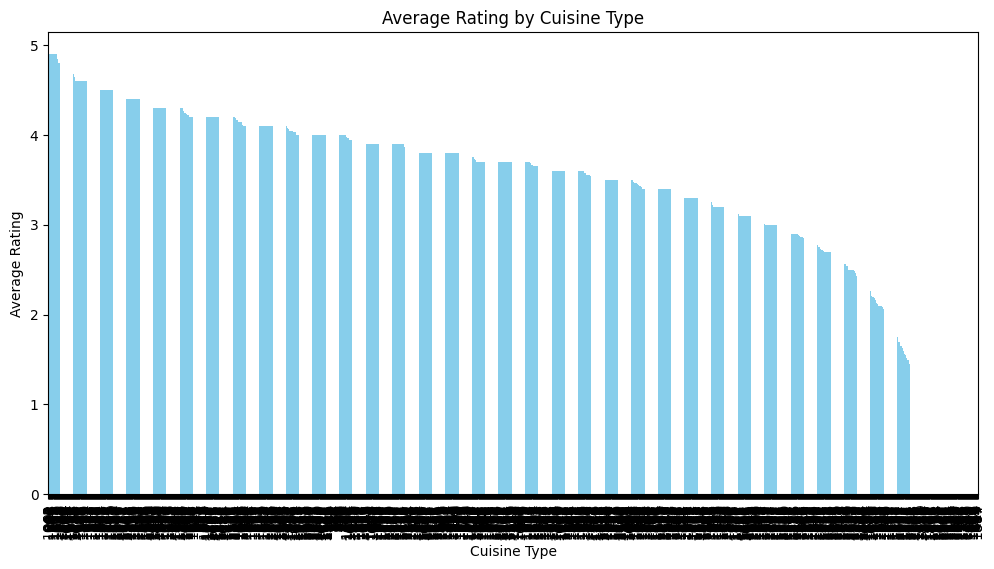

In [185]:
plt.figure(figsize=(12,6))
avg_rating_by_cuisine.plot(kind='bar',color='skyblue')
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.show()

# Identify the most popular cuisines among customers based on the number of votes.

In [186]:
# Topmost 10 cuisines based on the number of votes
total_votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)
print("Top cuisines based on total votes:")
print(total_votes_by_cuisine.head(10))

Top cuisines based on total votes:
Cuisines
1514    53747
1306    48967
1329    42012
331     30657
497     21925
1520    20115
828     17852
1699    16433
1288    15275
1031    14799
Name: Votes, dtype: int64


# Determine if there are any specific cuisines that tend to receive higher ratings.

In [187]:
# The top 10 cuisines with the highest average rating
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)
print("Top cuisines based on average rating:")
print(avg_rating_by_cuisine.head(10))

Top cuisines based on average rating:
Cuisines
1062    4.9
949     4.9
93      4.9
683     4.9
796     4.9
803     4.9
808     4.9
169     4.9
41      4.9
1779    4.9
Name: Aggregate rating, dtype: float64


# **Level 3 : Task 3**
**Task: Data Visualization**

# Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

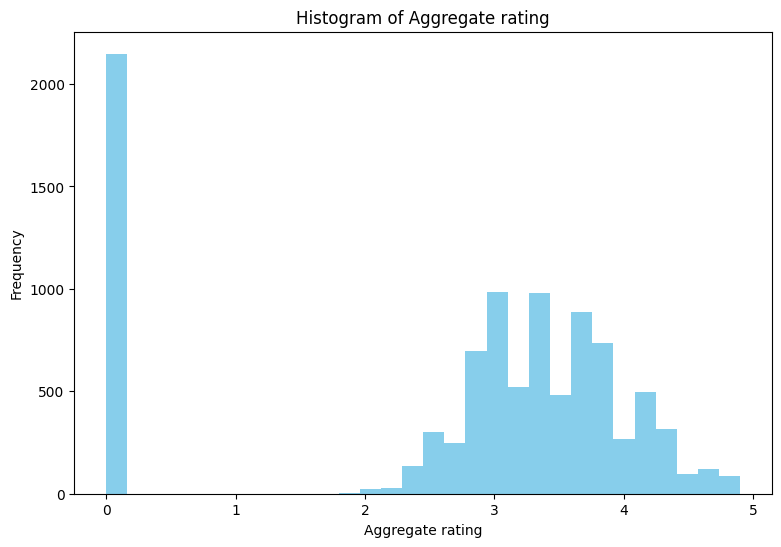

In [188]:
# Histogram of Aggregate rating
plt.figure(figsize=(9,6))
plt.hist(df['Aggregate rating'],bins=30,color='skyblue')
plt.title('Histogram of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

In [189]:
aggregate_ratings_counts = df['Aggregate rating'].value_counts()
values = aggregate_ratings_counts.values
labels = aggregate_ratings_counts.index.to_list()

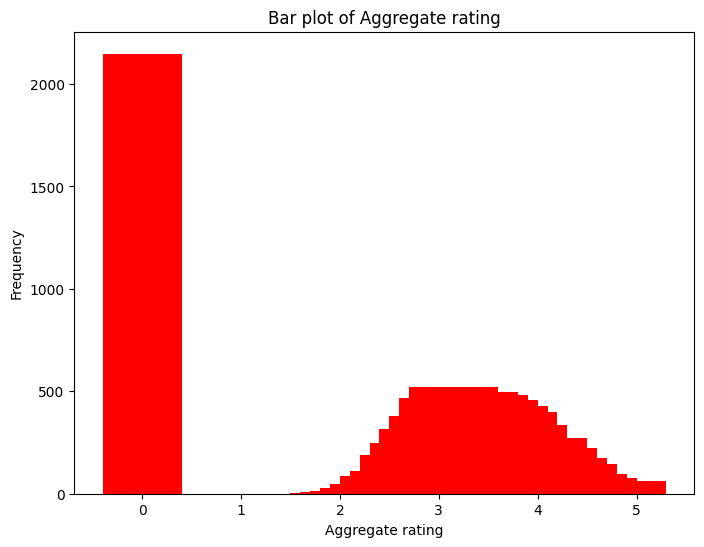

In [190]:
# bar plot of Aggregate rating
plt.figure(figsize=(8, 6))
plt.bar(labels, values,color='red')
plt.title('Bar plot of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.show()

# Compare the average ratings of different cuisines or cities using appropriate visualizations.

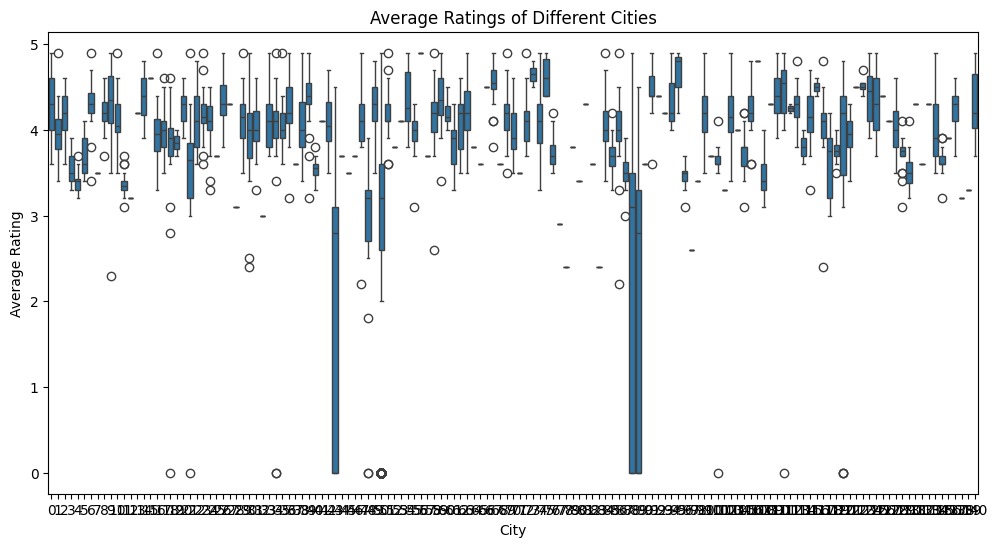

In [191]:
# Plotting the average ratings of different cities using a box plot
plt.figure(figsize=(12,6))
sns.boxplot(x='City',y='Aggregate rating',data=df)
plt.title('Average Ratings of Different Cities')
plt.xlabel('City')
plt.ylabel('Average Rating')
plt.show()

# Visualize the relationship between various features and the target variable to gain insights.

In [192]:
# Relationship between independent features with dependent feature
independent_features = ['Restaurant Name', 'Country Code', 'City', 'Address', 'Locality',
       'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Rating color', 'Rating text',
       'Votes']
dependent_feature = 'Aggregate rating'

fig, axes = plt.subplots(nrows=len(independent_features), ncols=1, figsize=(8, 6 * len(independent_features)))

for i, feature in enumerate(independent_features):
    ax = axes[i]
    ax.scatter(df[feature], df[dependent_feature], alpha=0.5)
    ax.set_title(f'Scatter Plot: {feature} vs {dependent_feature}')
    ax.set_xlabel(feature)
    ax.set_ylabel(dependent_feature)
    ax.grid(True)

plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.